In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import utils
import sys, os
parent_dir = os.path.abspath(os.path.join(os.path.dirname(os.getcwd()), ''))
sys.path.insert(0,parent_dir)
from utils import *
%matplotlib inline

In [2]:
# variables
qscore_22_file = QSCORE_22
qscore_23_file = QSCORE_23
qscore_31_file = QSCORE_31
rolling_avg_window = 10
figsize = (6,2)
dpi = 400
ticksize = 12
labelsize = 14
titlesize = 16
domainwidth = 20
linewidth = 1.5
fig_name = "Qscore_22_23_31"
plt.rcParams["font.family"] = "sans-serif"
#plt.rcParams["font.serif"] = ["Times New Roman"]
plt.rcParams['svg.fonttype'] = 'none'

In [3]:
# read and format Qscores
col_names = ['atom_name','residue_number','residue_name','x_coord','y_coord','z_coord','Qscore']

qscore_22 = pd.read_csv(qscore_22_file,names=col_names)
qscore_22["residue_number"] = qscore_22.residue_number.apply(lambda x: int(x.split(".")[0]))
qscore_23 = pd.read_csv(qscore_23_file,names=col_names)
qscore_23["residue_number"] = qscore_23.residue_number.apply(lambda x: int(x.split(".")[0]))
qscore_31 = pd.read_csv(qscore_31_file,names=col_names)
qscore_31["residue_number"] = qscore_31.residue_number.apply(lambda x: int(x.split(".")[0]))

In [4]:
# get only RNA atoms
q22 = qscore_22[(~qscore_22.residue_name.isin(['MG', 'HOH']))&(qscore_22.atom_name.str[0]!="H")].reset_index()
q23 = qscore_23[(~qscore_23.residue_name.isin(['MG', 'HOH']))&(qscore_23.atom_name.str[0]!="H")].reset_index()
q31 = qscore_31[(~qscore_31.residue_name.isin(['MG', 'HOH']))&(qscore_31.atom_name.str[0]!="H")].reset_index()

In [5]:
print(q22.Qscore.mean())
print(q23.Qscore.mean())

0.6485255667951367
0.637617012813551


In [6]:
print(qscore_22[qscore_22.residue_name.isin(['MG'])].Qscore.mean())
print(qscore_23[qscore_23.residue_name.isin(['MG'])].Qscore.mean())
print(qscore_22[qscore_22.residue_name.isin(['HOH'])].Qscore.mean())
print(qscore_23[qscore_23.residue_name.isin(['HOH'])].Qscore.mean())

0.8644027607194139
0.850481277606492
0.8683298202975327
0.8634161999161643


2.2A expected Q 0.6934
2.3A expected Q 0.6796


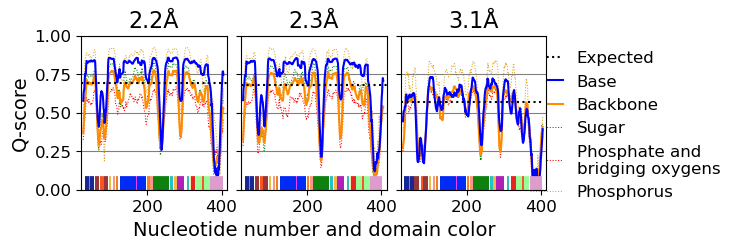

In [8]:
BACKBONE = ["C1'", "C2'", "C3'", "C4'", "C5'", "O4'", "O5'", "O2'", "O3'",'P','OP1', 'OP2']
SUGAR = ["C1'", "C2'", "C3'", "C4'", "C5'", "O4'", "O2'"]
PHOSPHATE = ['P','OP1', 'OP2', "O5'", "O3'"]
PHOSPHOROUS = ['P']
BRIDING_O = ["O5'", "O3'"]
OP = ['OP1', 'OP2']

def plot_rolling_average(df,ax,window):
    # seperate by atom type, then taking rolling average
    df_sugar = df[df.atom_name.isin(SUGAR)].groupby("residue_number").Qscore.mean().reset_index()
    df_sugar['Qscore rolling'] = df_sugar.Qscore.rolling(window,center=True).mean()
    gsugar=sns.lineplot(data=df_sugar,x="residue_number",y="Qscore rolling",color="green" ,linestyle=":",linewidth=linewidth/2,ax=ax)

    df_o = df[df.atom_name.isin(BRIDING_O+OP)].groupby("residue_number").Qscore.mean().reset_index()
    df_o['Qscore rolling'] = df_o.Qscore.rolling(window,center=True).mean()
    go=sns.lineplot(data=df_o,x="residue_number",y="Qscore rolling",color="red" ,linestyle=":",linewidth=linewidth/2,ax=ax)

    df_p = df[df.atom_name.isin(PHOSPHOROUS)].groupby("residue_number").Qscore.mean().reset_index()
    df_p['Qscore rolling'] = df_p.Qscore.rolling(window,center=True).mean()
    gp=sns.lineplot(data=df_p,x="residue_number",y="Qscore rolling",color="goldenrod" ,linestyle=":",linewidth=linewidth/2,ax=ax)
    
    df_base = df[df.atom_name.isin(BACKBONE)].groupby("residue_number").Qscore.mean().reset_index()
    df_base['Qscore rolling'] = df_base.Qscore.rolling(window,center=True).mean()
    gbase=sns.lineplot(data=df_base,x="residue_number",y="Qscore rolling",color="darkorange" ,linestyle="-",linewidth=linewidth,ax=ax)
    
    df_base = df[~df.atom_name.isin(BACKBONE)].groupby("residue_number").Qscore.mean().reset_index()
    df_base['Qscore rolling'] = df_base.Qscore.rolling(window,center=True).mean()
    gbase=sns.lineplot(data=df_base,x="residue_number",y="Qscore rolling",color="blue" ,linestyle="-",linewidth=linewidth,ax=ax)

fig, axes = plt.subplots(1,3,figsize=figsize,sharey=True)
plt.subplots_adjust(wspace=0.1)

# plot Q scores and expected Q lines
plot_rolling_average(q22,axes[0],rolling_avg_window)
res=2.2
expected_q=(-0.138*res)+0.997
print("2.2A expected Q",expected_q)
h1=axes[0].hlines(expected_q,q22["residue_number"].min(),q22["residue_number"].max(),linestyle=":",color="black",linewidth=linewidth)

plot_rolling_average(q23,axes[1],rolling_avg_window)
res=2.3
expected_q=(-0.138*res)+0.997
print("2.3A expected Q",expected_q)
h1=axes[1].hlines(expected_q,q23["residue_number"].min(),q23["residue_number"].max(),linestyle=":",color="black",linewidth=linewidth)

plot_rolling_average(q31,axes[2],rolling_avg_window)
res=3.1
expected_q=(-0.138*res)+0.997
h1=axes[2].hlines(expected_q,q31["residue_number"].min(),q31["residue_number"].max(),linestyle=":",color="black",linewidth=linewidth)

# add the marker for domains
width = domainwidth 
for ax1 in axes:
    ax1.set_xlim(q22["residue_number"].min(),q22["residue_number"].max())
    ax1.set_ylim(0,1)
    ax1.yaxis.grid(which='major', linestyle='-',  color='grey')
    #P2.1 -- changed
    ax1.hlines(0,58,69,color=(0.59,0.21,0.21),linewidth=width)
    ax1.hlines(0,82,94,color=(0.59,0.21,0.21),linewidth=width)
    #P2
    ax1.hlines(0,31,43,color=(0.09,0.15,0.59),linewidth=width)
    ax1.hlines(0,46,57,color=(0.09,0.15,0.59),linewidth=width)
    #P3
    ax1.hlines(0,271,279,color=(0.95,0.73,0.27),linewidth=width)
    ax1.hlines(0,96,102,color=(0.95,0.73,0.27),linewidth=width)
    #P4 -- changed
    ax1.hlines(0,107,113,color=(0.98,0.59,0.53),linewidth=width)
    ax1.hlines(0,208,215,color=(0.98,0.59,0.53),linewidth=width)
    #P5
    ax1.hlines(0,116,122,color=(0.93,0.51,0.15),linewidth=width)
    ax1.hlines(0,200,206,color=(0.93,0.51,0.15),linewidth=width)
    #P5abc -- changed
    ax1.hlines(0,126,169,color=(0.00,0.17,0.97),linewidth=width)
    ax1.hlines(0,173,196,color=(0.00,0.17,0.97),linewidth=width)
    #P6 -- changed
    ax1.hlines(0,215,259,color=(0.05,0.50,0.05),linewidth=width)
    #P7 -- changed
    ax1.hlines(0,262,269,color=(0.17,0.75,0.75),linewidth=width)
    ax1.hlines(0,307,313,color=(0.17,0.75,0.75),linewidth=width)
    #P8
    ax1.hlines(0,279,300,color=(0.67,0.13,0.73),linewidth=width)
    #P9
    ax1.hlines(0,318,332,color=(0.91,0.14,0.13),linewidth=width)
    #P9.1 -- changed
    ax1.hlines(0,353,368,color=(0.60,0.99,0.60),linewidth=width)
    ax1.hlines(0,332,347,color=(0.60,0.99,0.60),linewidth=width)
    #P9.2 -- changed
    ax1.hlines(0,369,403,color=(0.87,0.61,0.80),linewidth=width)
    #P9a -- changed
    ax1.hlines(0,315,317,color=(0.95,0.91,0.63),linewidth=width)
    ax1.hlines(0,328,330,color=(0.95,0.91,0.63),linewidth=width)
    #P13 -- changed
    ax1.hlines(0,347,353,color=(0.98,0.33,0.14),linewidth=width)
    ax1.hlines(0,75,82,color=(0.98,0.33,0.14),linewidth=width)
    ax1.hlines(0,73,74,color=(0.98,0.33,0.14),linewidth=width)
    #P14 -- changed
    ax1.hlines(0,43,46,color=(0.93,0.25,0.96),linewidth=width)
    ax1.hlines(0,169,173,color=(0.93,0.25,0.96),linewidth=width)

    ax1.tick_params(axis='x', labelsize=ticksize)
    ax1.tick_params(axis='y', labelsize=ticksize)

# format more and save
axes[0].set_ylabel("Q-score",size=labelsize) 
axes[1].set_xlabel("Nucleotide number and domain color",size=labelsize)
axes[0].set_xlabel("")
axes[2].set_xlabel("")
handles = [h1,axes[0].get_lines()[4],axes[0].get_lines()[3],axes[0].get_lines()[0],axes[0].get_lines()[1],axes[0].get_lines()[2]]

leg = axes[1].legend(handles,["Expected","Base","Backbone","Sugar","Phosphate and \nbridging oxygens","Phosphorus"],
               loc='upper right', bbox_to_anchor=(3.4,1),ncol=1,fontsize=ticksize,frameon=False)#,markerscale=60)

axes[0].set_title("2.2Å",size=titlesize)
axes[1].set_title("2.3Å",size=titlesize)
axes[2].set_title("3.1Å",size=titlesize)
plt.savefig(f"{fig_name}.png",dpi=dpi,bbox_inches="tight",transparent=True)
plt.savefig(f"{fig_name}.svg",bbox_inches="tight",transparent=True)

In [9]:
print(q22.groupby("residue_number").Qscore.mean()[[308,309,310,311]])
print(q22[~q22.atom_name.isin(BACKBONE)].groupby("residue_number").Qscore.mean()[[308,309,310,311]])
print(q22[q22.atom_name.isin(BACKBONE)].groupby("residue_number").Qscore.mean()[[308,309,310,311]])

residue_number
308    0.806431
309    0.773155
310    0.791798
311    0.817685
Name: Qscore, dtype: float64
residue_number
308    0.848161
309    0.862665
310    0.846778
311    0.847761
Name: Qscore, dtype: float64
residue_number
308    0.771657
309    0.691104
310    0.755144
311    0.797634
Name: Qscore, dtype: float64
